# how Experta works

 The Rete algorithm
 
    The typical rule-based system has a more or less fixed set of rules, whereas the working memory changes        continuously. However, it is an empirical fact that in most rule-based systems, much of the working memory is also fairly fixed over time

 Although new facts arrive and old ones are removed as the system runs, the percentage of facts that change per unit time is generally fairly small.

The rules finding facts algorithm is therefore needlessly inefficient, because most of the tests made on each cycle will have the same results as on the previous iteration. An algorithm that could somehow remember previous pattern-matching results between cycles, only updating matches for facts that actually changed, could do far less work and get the same results.

# Experta uses a very efficient version of this idea, known as the Rete algorithm.

he Rete algorithm eliminates the inefficiency in the simple pattern matcher by remembering past test results across iterations of the rule loop. Only new or deleted working memory elements are tested against the rules at each step. Furthermore, Rete organizes the pattern matcher so that these few facts are only tested against the subset of the rules that may actually match.


How Rete works

Rete is Latin for net (it’s pronounced “ree-tee”). The Rete algorithm is implemented by building a network of interconnected nodes. Every node represents one or more tests found on the LHS of a rule. Each node has one or two inputs and any number of outputs. Facts that are being added to or removed from the working memory are processed by this network of nodes. The input nodes are at the top of the network, and the output nodes are at the bottom. Together, these nodes form the Rete network, and this network is how Jess’s working memory is implemented.

At the top of the network, the input nodes separate the facts into categories (class)
each input node go through one path


 Inside the network, finer discriminations and associations between facts are made, until the facts get to the bottom. At the bottom of the network are nodes representing individual rules. When a set of facts filters all the way down to the bottom of the network, it has passed all the tests on the LHS of a particular rule; it has passed all the tests on the LHS of a particular rule; this set, together with the rule itself, becomes either a new activation record or a command to cancel a previously existing activation record (recall that an activation record is an association of a list of facts with a rule that they activate).

if the following set of production rules and facts are considered,
then the network displayed will be created. The figure also shows how
tokens corresponding to different facts pass through the network.
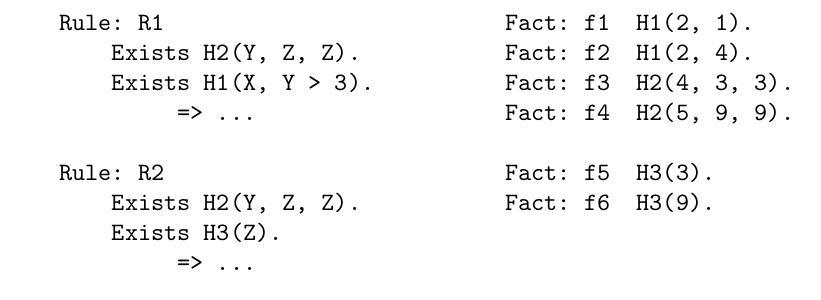


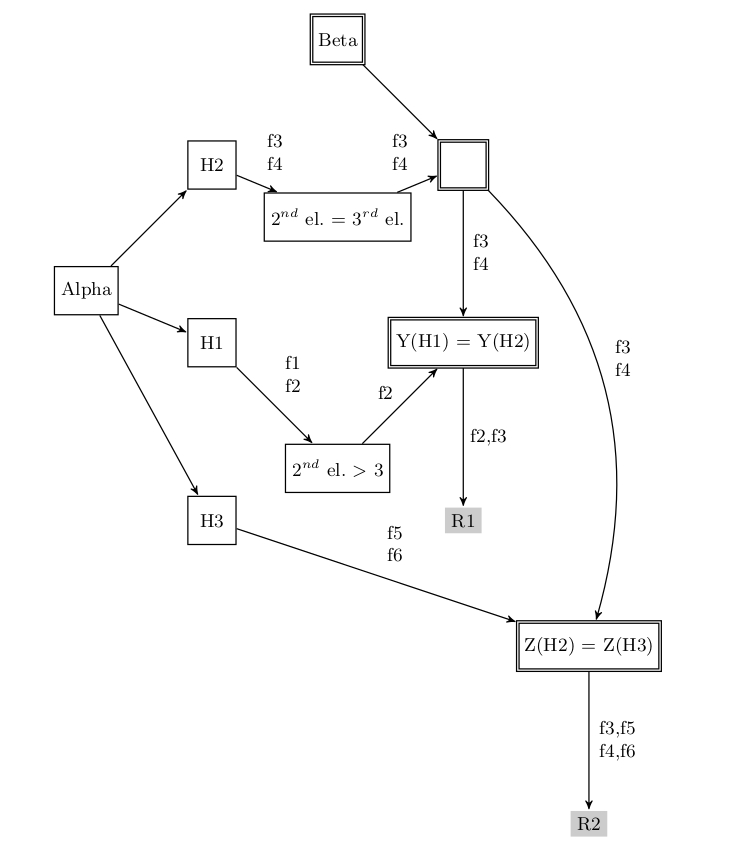

Between the inputs and the outputs, the network is composed of two broad categories of nodes: one-input nodes or or pattern nodes. and two-input nodes or join nodes. One-input nodes perform tests on individual facts, and two-input nodes perform tests across multiple facts. Each join node joins the results of matching the first n-1 patterns (coming from upper left in the diagram) with the nth pattern (attached at upper right in the diagram).
 Join nodes remember all facts or groups of facts that arrive on either of their two inputs. The network is built so that the left input can receive groups of one or more facts; the right input receives only single facts. Every join node produces groups of two or more facts as at its output.
  The arrivals from the two inputs are kept in separate memory areas

The notation LEFT.p.q==RIGHT.r? indicates a test comparing the contents of slot q in the pth fact in a group from the left memory to the slot r in a fact from the right memory.

 Easy optimizations for Rete
There are many optimizations, however, which can make it even better. Two easy ones work by introducing node sharing into the network. The first optimization is to share nodes in the pattern network.

Performance of the Rete algorithm
In general, the performance on the first cycle is basically the same for the two algorithms; Rete has to do pattern matching for every fact in working memory, because there are no previous results to consult

In the worst case, where every fact changes on every cycle and there is no network sharing between rules, then the performance for later cycles is the same as well. 

. The runtime will be proportional to something like R′F′P′, where R′ is a number less than R, the number of rules; F′ is the number of facts that change on each iteration; and P′ is a number greater than one but less than the average number of patterns per rule.

In [1]:
!pip install graphviz

In [4]:
from experta import *
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b))
    def bird_can_fly(self,b):
        self.declare(fly(x=b))

    @Rule(penguin(x=MATCH.b),bird(x=MATCH.b))
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        
    

ke = MutableTest()
ke.reset()
watch('RULES')
ke.declare(*[bird(x="tweety"),penguin(x="tweety")])
ke.run()
ke.facts


INFO:experta.watchers.RULES:FIRE 1 penguin_cannot_fly: <f-2>, <f-1>
INFO:experta.watchers.RULES:FIRE 2 bird_can_fly: <f-1>


FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, penguin(x='tweety')),
          (3, notfly(x='tweety')),
          (4, fly(x='tweety'))])

In [5]:
ke.matcher.show_network()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [6]:
from experta import *
class bird(Fact):
    pass

class fly(Fact):
    pass

class notfly(Fact):
    pass

class penguin(Fact):
    pass



class MutableTest(KnowledgeEngine):
    @Rule(bird(x=MATCH.b))
    def bird_can_fly(self,b):
        self.declare(fly(x=b))
        
#     @Rule(bird(x=MATCH.b))
#     def bird_is_penguin(self,b):
#         self.declare(penguin(x=b))

    @Rule(bird(x=MATCH.b),penguin(x=MATCH.b))
    def penguin_cannot_fly(self,b):
        self.declare(notfly(x=b))
        
    
watch('MATCHER')
ke = MutableTest()
ke.reset()

ke.declare(*[bird(x="tweety"),bird(x="tweety1"),penguin(x="tweety")])
#ke.declare(*[bird(x="tweety1"),penguin(x="tweety1")])
ke.run()
ke.facts
# ke.matcher.show_network()

DEBUG:experta.watchers.MATCHER:Node <BusNode> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: type() == bird> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: x (wildcard_match) W('b')> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: __pattern_1502130105536__ <= <Fact>> reset
DEBUG:experta.watchers.MATCHER:Node <ConflictSetNode: bird_can_fly> reset
DEBUG:experta.watchers.MATCHER:Node <OrdinaryMatchNode: SameContextCheck> reset
DEBUG:experta.watchers.MATCHER:Node <ConflictSetNode: penguin_cannot_fly> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: type() == penguin> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: x (wildcard_match) W('b')> reset
DEBUG:experta.watchers.MATCHER:Node <FeatureTesterNode: __pattern_1502130105776__ <= <Fact>> reset
DEBUG:experta.watchers.MATCHER:Node <OrdinaryMatchNode: SameContextCheck> reset
DEBUG:experta.watchers.MATCHER:Node <ConflictSetNode: penguin_cannot_fly> reset
DEBUG:experta.watch

FactList([(0, InitialFact()),
          (1, bird(x='tweety')),
          (2, bird(x='tweety1')),
          (3, penguin(x='tweety')),
          (4, notfly(x='tweety')),
          (5, fly(x='tweety1')),
          (6, fly(x='tweety'))])

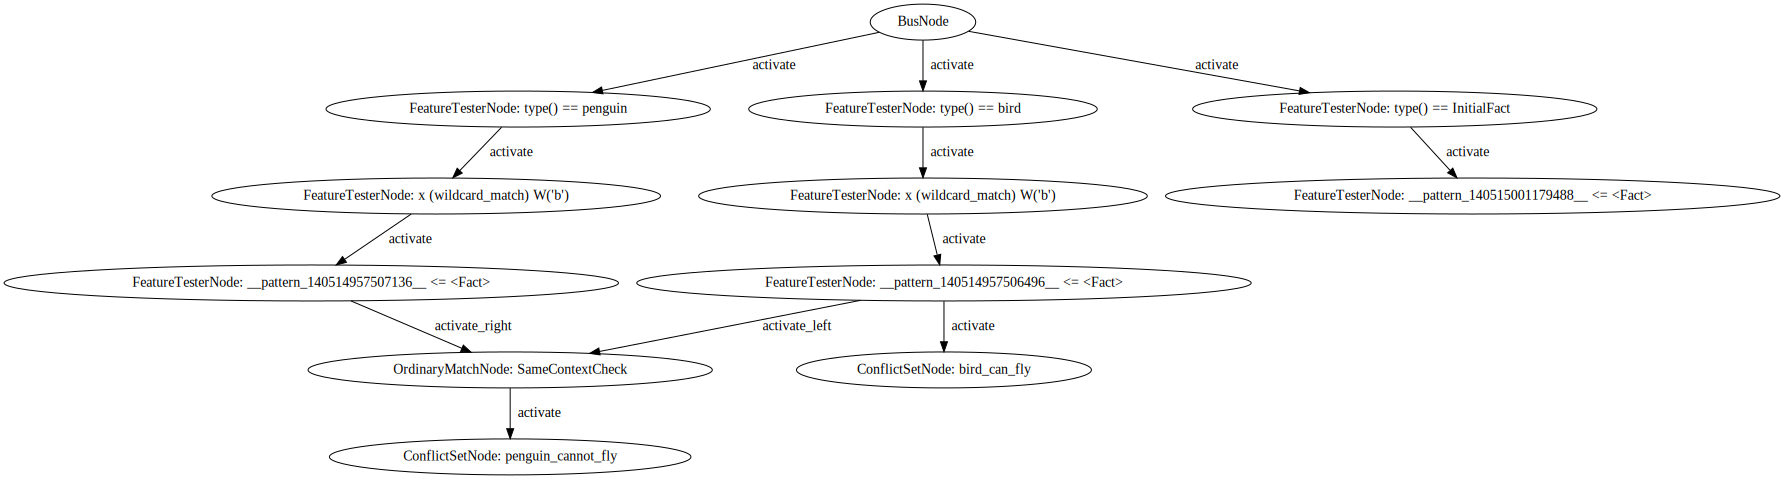

In [6]:
ke.matcher.show_network()